In [1]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

"""create dfs"""
dems = pd.read_csv('data\\dems_cleaned_up.csv')

cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']

"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


Five Number Summary:
count    60208.000000
mean         0.118126
std          0.290073
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.255682
max          1.000000
Name: polarity, dtype: float64


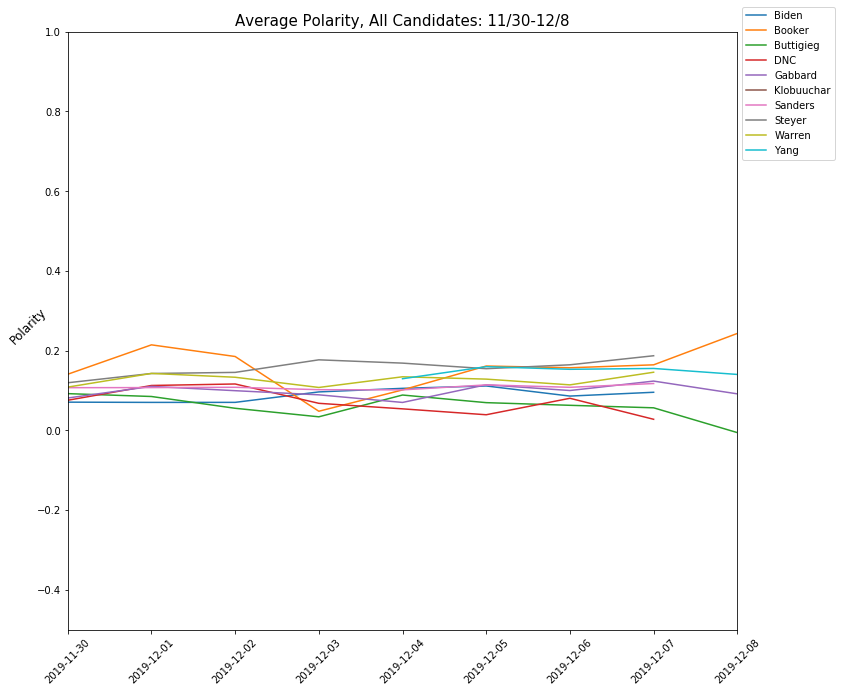

In [9]:
temp_term = ['day', 'candidate', 'polarity']
metric = 'mean'
print('Five Number Summary:\n{}'.format(dems['polarity'].describe()))



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure(figsize=(15,15))
temp_dem.plot(kind='line', legend=False, figsize=(12,11))
plt.ylim(-0.5, 1)
plt.xticks(rotation=45)
plt.ylabel('Polarity', fontsize=12, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.title('Average Polarity, All Candidates: 11/30-12/8', fontsize=15)
plt.savefig('charts\\polarity_all.png')
plt.show()

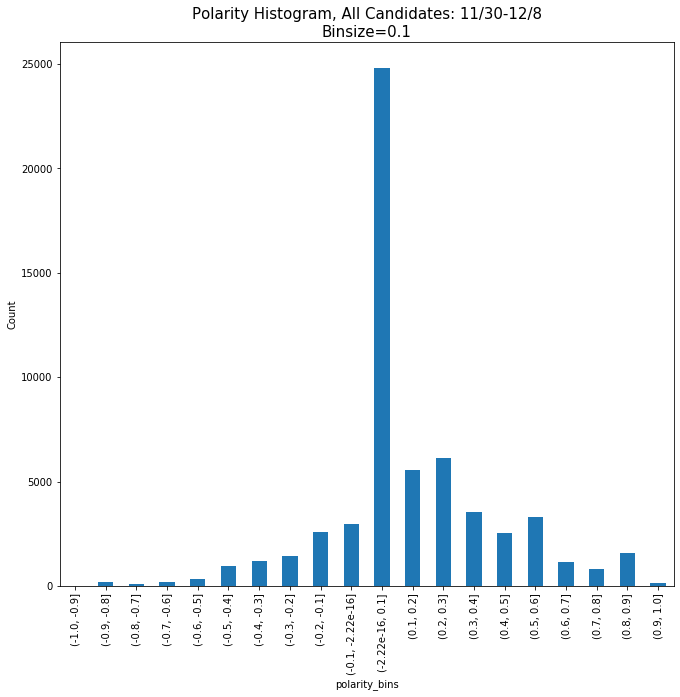

In [12]:
"""Polarity Histogram"""
bins = np.arange(-1, 1.1, 0.1)
dems['polarity_bins'] = pd.cut(dems['polarity'], bins=bins)#, labels=labels)

dems.groupby(['polarity_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Polarity Histogram, All Candidates: 11/30-12/8\nBinsize=0.1', fontsize=15)
plt.ylabel('Count')
plt.savefig('charts\\polarity_hist_all.png')
plt.show()

In [ ]:
dems['polarity_bins'].value_counts().iloc[:5]

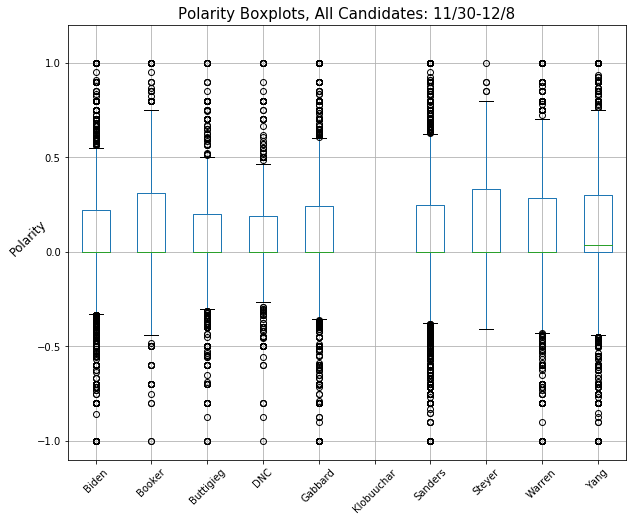

In [13]:
temp_term = ['polarity']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-1.1, 1.2)
plt.ylabel('Polarity', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Polarity Boxplots, All Candidates: 11/30-12/8', fontsize=15)
plt.savefig('charts\\polarity_box_all.png')
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))

plt.show()

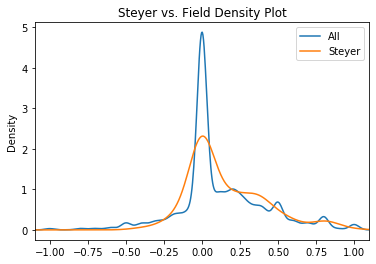

In [21]:
dems['polarity'].plot.kde(label='All')
steyer['polarity'].plot.kde(label='Steyer')
plt.legend()
plt.xlim(-1.1,1.1)
plt.title('Steyer vs. Field Density Plot')
plt.savefig('charts\\density_all_vs_steyer.png')
plt.show()

In [3]:
steyer[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,293.000000,293.000000,293.000000,293.000000
mean,0.156369,0.327036,2.709898,2.863481
std,0.255729,0.290772,7.128551,7.229255
min,-0.406250,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.350000,0.000000,2.000000
75%,0.333333,0.550000,3.000000,3.000000
max,1.000000,1.000000,70.000000,110.000000


In [8]:
biden[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,7097.000000,7097.000000,7097.000000,7097.000000
mean,0.086513,0.352854,14.375793,277.195153
std,0.291124,0.326447,341.063431,1244.579820
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.350000,0.000000,0.000000
75%,0.220000,0.600000,1.000000,2.000000
max,1.000000,1.000000,19606.000000,9341.000000
